<a href="https://colab.research.google.com/github/MatheusSantos3/Analise_Turistas_Interncionais-/blob/main/An%C3%A1lise_Turismo_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Análise da Imigração no Brasil**

*Uma análise sobre a chegada de turistas internacionais no Brasil a partir do ano de 1989*

O objetivo do notebook explorar os recursos de visualização utilizando um dataset com informações sobre a chegada de turistas internacionais no Brasil durante o período 01/1989 a 12/2023. O dataset foi obtido através do portal 'dados.gov.br'.


[Link do Dataset](https://dados.gov.br/dados/conjuntos-dados/estimativas-de-chegadas-de-turistas-internacionais-ao-brasil)

In [119]:
#Importação das Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df = pd.read_csv('/content/imigrantes.csv')

In [121]:
#Verificar tamanho do dataset
df.shape

(930816, 12)

In [122]:
df.head()

,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
0,África,1,África do Sul,2,Amazonas,4,Aérea,1,1989,janeiro,1,9.0
1,África,1,Angola,6,Amazonas,4,Aérea,1,1989,janeiro,1,0.0
2,África,1,Nigéria,162,Amazonas,4,Aérea,1,1989,janeiro,1,0.0
3,África,1,Outros países,998,Amazonas,4,Aérea,1,1989,janeiro,1,0.0
4,América Central e Caribe,2,Costa Rica,53,Amazonas,4,Aérea,1,1989,janeiro,1,6.0


**Continente** - Continente de origem do imigrante

**Cod Continente** - Código do continente de origem do imigrante

**País** - País de origem do imigrante

**Cod País** - Código do país de origem do imigrante

**UF** - Unidade Federativa de destino no imigrante

**Cod UF** - Código da Unidade Federativa de destino

**Via** - Via de transporte da imigração

**Cod Via** - Código da via de transporte

**Ano** - Ano da imigração

**Mês** - Mês da imigração

**Cod Mês** - Número do Mês

**Chegadas** - Quantidade de imigrantes

In [123]:
df.describe()

,cod continente,cod pais,cod uf,cod via,ano,cod mes,Chegadas
count,930816.000000,930816.000000,930816.000000,930816.000000,930816.000000,930816.000000,920964.000000
mean,4.495750,187.083254,23.478366,2.144751,2009.978612,6.535884,160.082474
std,1.799194,263.573496,26.340306,1.103452,10.118762,3.460985,1794.652036
min,1.000000,1.000000,1.000000,1.000000,1989.000000,1.000000,0.000000
25%,4.000000,53.000000,12.000000,1.000000,2002.000000,4.000000,0.000000
50%,5.000000,115.000000,17.000000,2.000000,2013.000000,7.000000,0.000000
75%,6.000000,182.000000,23.000000,3.000000,2019.000000,10.000000,5.000000
max,8.000000,999.000000,99.000000,4.000000,2023.000000,12.000000,386823.000000


In [124]:
#Verificar tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930816 entries, 0 to 930815
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Continente      930816 non-null  object 
 1   cod continente  930816 non-null  int64  
 2   País            930816 non-null  object 
 3   cod pais        930816 non-null  int64  
 4   UF              930816 non-null  object 
 5   cod uf          930816 non-null  int64  
 6   Via             930816 non-null  object 
 7   cod via         930816 non-null  int64  
 8   ano             930816 non-null  int64  
 9   Mês             930816 non-null  object 
 10  cod mes         930816 non-null  int64  
 11  Chegadas        920964 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 85.2+ MB


In [125]:
#Verificar e tratar dados nulos para converter coluna 'Chegadas' para inteiro
df[df.isnull().any(axis=1)]

,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
16464,África,1,África do Sul,2,Mato Grosso do Sul,12,Fluvial,4,1989,janeiro,1,NaN
16465,África,1,Angola,6,Mato Grosso do Sul,12,Fluvial,4,1989,janeiro,1,NaN
16466,África,1,Nigéria,162,Mato Grosso do Sul,12,Fluvial,4,1989,janeiro,1,NaN
16467,África,1,Outros países,998,Mato Grosso do Sul,12,Fluvial,4,1989,janeiro,1,NaN
16468,América Central e Caribe,2,Costa Rica,53,Mato Grosso do Sul,12,Fluvial,4,1989,janeiro,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
485059,Europa,6,Outros países,998,Mato Grosso do Sul,12,Fluvial,4,2014,dezembro,12,NaN
485060,Oceania,7,Austrália,14,Mato Grosso do Sul,12,Fluvial,4,2014,dezembro,12,NaN
485061,Oceania,7,Nova Zelândia,166,Mato Grosso do Sul,12,Fluvial,4,2014,dezembro,12,NaN
485062,Oceania,7,Outros países,998,Mato Grosso do Sul,12,Fluvial,4,2014,dezembro,12,NaN


In [126]:
#Será considerado o valor 0 para os dados nulos na coluna 'Chegadas'
df['Chegadas'].fillna(0, inplace=True)

In [127]:
df[df.isnull().any(axis=1)]

,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas


In [128]:
#Converter coluna 'Chegadas' para int
df['Chegadas'] = df['Chegadas'].astype(int)

In [129]:
#Converter as colunas de codigos de int para object

df['cod continente'] = df['cod continente'].astype(str)
df['cod pais'] = df['cod pais'].astype(str)
df['cod uf'] = df['cod uf'].astype(str)
df['cod via'] = df['cod via'].astype(str)


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930816 entries, 0 to 930815
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Continente      930816 non-null  object
 1   cod continente  930816 non-null  object
 2   País            930816 non-null  object
 3   cod pais        930816 non-null  object
 4   UF              930816 non-null  object
 5   cod uf          930816 non-null  object
 6   Via             930816 non-null  object
 7   cod via         930816 non-null  object
 8   ano             930816 non-null  int64 
 9   Mês             930816 non-null  object
 10  cod mes         930816 non-null  int64 
 11  Chegadas        930816 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 85.2+ MB


In [131]:
#Quantos países foram analisados?

df['País'].nunique()

91

***Após observar as informações das colunas, serão traçadas algumas perguntas a serem feitas para o dataset, com objetivo de respondê-las com gráficos.***



1.   Quais são os principais países de origem dos turistas?
2.   Como o turismo varia por continente de origem?
3.   Qual é a distribuição das chegadas de turistas ao longo dos anos?
4.   Quais são os meses com maior número de chegadas de turistas?
5.   Qual é a distribuição das chegadas de turistas por UF?
6.   Qual é a distribuição das chegadas de turistas por continente e UF?
7.   Como o turismo varia por UF ao longo do tempo?
8.   Qual via de turismo (aérea, terrestre, marítima) é a mais comum e como isso mudou ao longo do tempo?
9.   Quais são as diferenças nas tendências de turismo por continente de origem antes e depois de 2000?
10.  Quais países contribuem mais para o turismo em cada continente?
11.  Existem sazonalidades nas chegadas de turistas ao longo dos meses?
12.  Qual é a correlação entre crises econômicas globais e o turismo para o Brasil?






## Quais são os principais países de origem dos turistas?


In [17]:
df.head()

,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
0,África,1,África do Sul,2,Amazonas,4,Aérea,1,1989,janeiro,1,9
1,África,1,Angola,6,Amazonas,4,Aérea,1,1989,janeiro,1,0
2,África,1,Nigéria,162,Amazonas,4,Aérea,1,1989,janeiro,1,0
3,África,1,Outros países,998,Amazonas,4,Aérea,1,1989,janeiro,1,0
4,América Central e Caribe,2,Costa Rica,53,Amazonas,4,Aérea,1,1989,janeiro,1,6


In [18]:
#Verificar os 10 países com mais turistas
soma_paises = df[['País','Chegadas']].groupby('País')['Chegadas'].sum().nlargest(10).reset_index().sort_values('Chegadas', ascending=False)
soma_paises


,País,Chegadas
0,Argentina,42812900
1,Estados Unidos,16743326
2,Uruguai,8336123
3,Paraguai,8017636
4,Alemanha,6752713
5,Chile,6348765
6,Itália,5893842
7,França,5730288
8,Portugal,5076338
9,Reino Unido,4150193


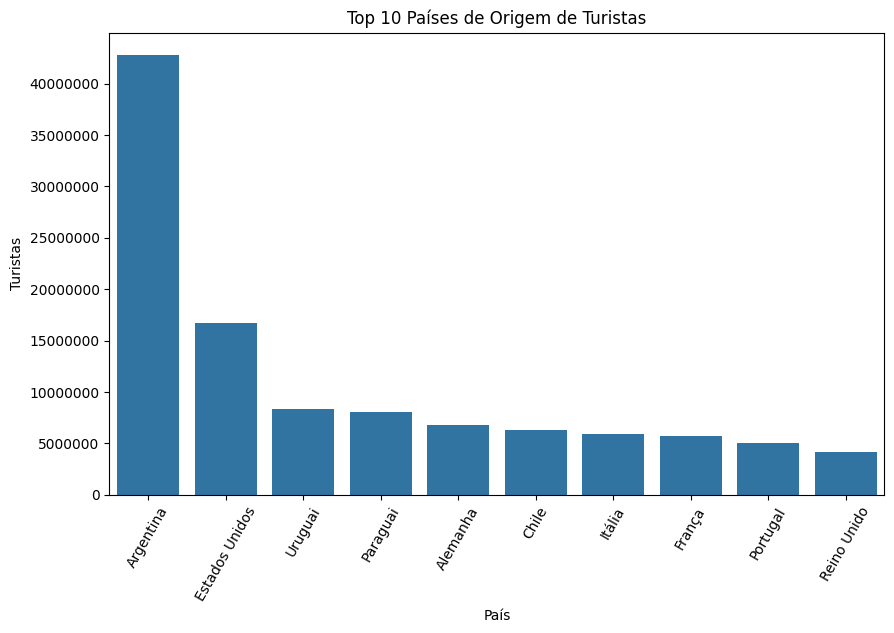

In [19]:
#Tamanho do gráfico
plt.figure(figsize=(10,6))
#Remover o formato de notação cientifica
plt.ticklabel_format(style='plain', axis='y')
#Gráfico de Barras
sns.barplot(data= soma_paises, x= 'País', y='Chegadas')
#Titulo e rotação da legenda
plt.title('Top 10 Países de Origem de Turistas')
plt.ylabel('Turistas')
plt.xticks(rotation=60)
plt.show()

In [46]:
dez_anos = df.loc[df['ano']>2014]

In [48]:
soma_10anos = dez_anos[['País','Chegadas']].groupby('País')['Chegadas'].sum().nlargest(10).reset_index()

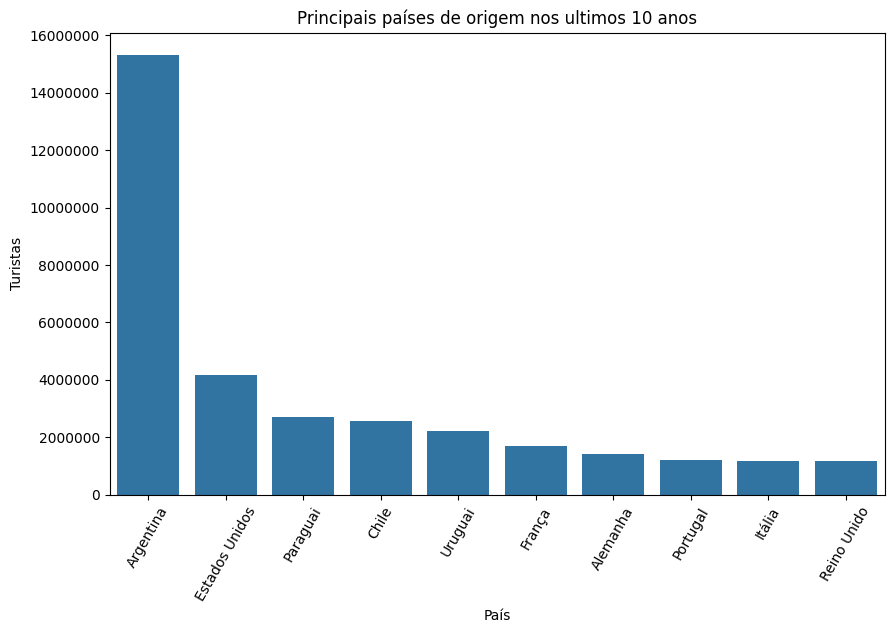

In [49]:
plt.figure(figsize=(10,6))
plt.ticklabel_format(style='plain')
sns.barplot(data=soma_10anos, x='País', y='Chegadas')
plt.title('Principais países de origem nos ultimos 10 anos')
plt.ylabel('Turistas')
plt.xticks(rotation=60)
plt.show()

Pode-se constatar, observando todo o intervalo de tempo analisado (1989 a 2023), que a Argentina é o país de onde vem o maior número de turistas ao Brasil.

Sabendo da crise financeira que a Argentina vive, pode-se ainda analisar como foi o comportamento do turismo do país nos últimos anos e realizar um comparativo entre um intervalo de tempo anterior à crise.

Para isso, serão analisados as chegadas de turistas argentinos nos últimos 10 anos, observando assim se a crise econômica do país argentino causou algum grande impacto no turismo ao Brasil e por consequência, à economia brasileira relacionada ao turismo.



In [20]:
#Verificar comportamento da Argentina a partir de 2012
argentina = df.loc[(df['País']=='Argentina') & (df['ano'] > 2012)]

In [21]:
argentina

,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
458201,América do Sul,4,Argentina,11,Amazonas,4,Aérea,1,2013,janeiro,1,29
458257,América do Sul,4,Argentina,11,Amazonas,4,Aérea,1,2013,fevereiro,2,231
458313,América do Sul,4,Argentina,11,Amazonas,4,Aérea,1,2013,março,3,35
458369,América do Sul,4,Argentina,11,Amazonas,4,Aérea,1,2013,abril,4,43
458425,América do Sul,4,Argentina,11,Amazonas,4,Aérea,1,2013,maio,5,44
...,...,...,...,...,...,...,...,...,...,...,...,...
930792,América do Sul,4,Argentina,26,Santa Catarina,24,Fluvial,4,2023,Marco,3,3
930793,América do Sul,4,Argentina,26,Santa Catarina,24,Fluvial,4,2023,Abril,4,0
930794,América do Sul,4,Argentina,26,Santa Catarina,24,Fluvial,4,2023,Maio,5,0
930795,América do Sul,4,Argentina,26,Santa Catarina,24,Fluvial,4,2023,Junho,6,0


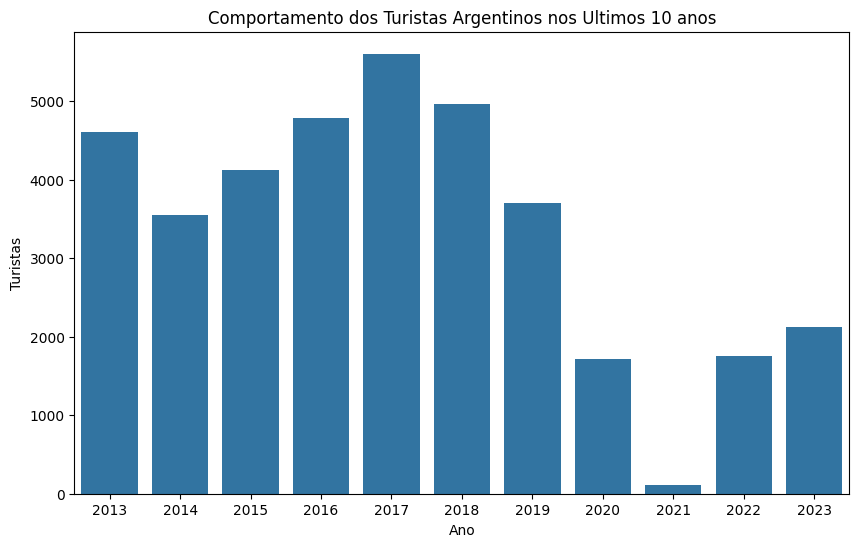

In [109]:
plt.figure(figsize=(10,6))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(data=argentina, x='ano', y='Chegadas', errorbar=None)
plt.title('Comportamento dos Turistas Argentinos nos Ultimos 10 anos')
plt.xticks(rotation=0)
plt.xlabel('Ano')
plt.ylabel('Turistas')
plt.show()

Existem dois fatores a serem levados em consideração: a pandemia do Covid-19 e a crise econômica na Argentina. Com a análise dos dados apresentados, pode-se observar que mesmo após o fim da pandemia, a quantidade de turistas permanece baixa em relação aos anos anteriores. Existe um leve crescimento nos números de 2023 em relação a 2022, mas quando comparado aos anos anteriores, é um número muito inferior. Esse fato pode ser creditado à crise econômica ou pode ser apenas uma consequência da pandemia vivida.

Para confirmar esse evento, podemos analisar o comportamento de outros países diante dos efeitos causados pela pandemia.


In [23]:
#Verificar comportamento dos EUA a partir de 2012
eua_10anos = df.loc[(df['País']=='Estados Unidos') & (df['ano'] > 2012)]

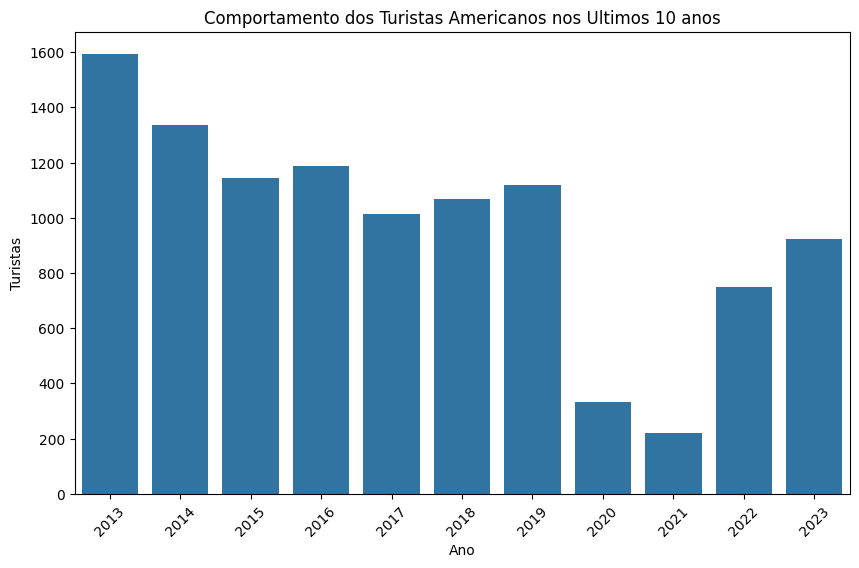

In [110]:
plt.figure(figsize=(10,6))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(data=eua_10anos, x='ano', y='Chegadas', errorbar=None)
plt.title('Comportamento dos Turistas Americanos nos Ultimos 10 anos')
plt.xticks(rotation=45)
plt.xlabel('Ano')
plt.ylabel('Turistas')
plt.show()

In [25]:
#Verificar comportamento dos EUA a partir de 2012
uru_10anos = df.loc[(df['País']=='Uruguai') & (df['ano'] > 2012)]

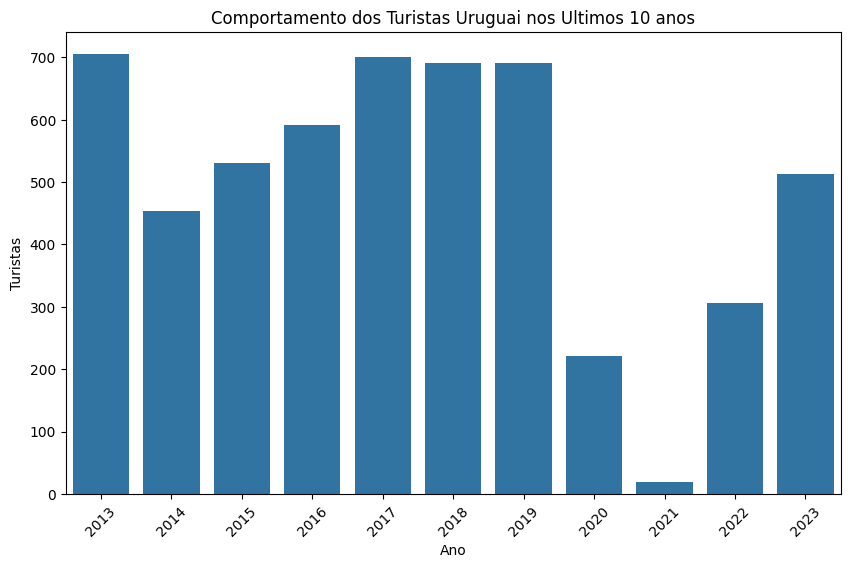

In [111]:
plt.figure(figsize=(10,6))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(data=uru_10anos, x='ano', y='Chegadas', errorbar=None)
plt.title('Comportamento dos Turistas Uruguai nos Ultimos 10 anos')
plt.xticks(rotation=45)
plt.xlabel('Ano')
plt.ylabel('Turistas')
plt.show()

Observando o comportamento dos turistas dos Estados Unidos e Uruguai, pode-se perceber que após o período da pandemia, já no ano de 2022, a quantidade de turistas vindos desses países aumentou, se aproximando dos números de antes da pandemia. Já com os turistas argentinos, após o tempo pandêmico, o número permanece abaixo quando comparado aos turistas dos anos anteriores a pandemia.

Pode-se concluir, portanto, que a crise econômica na Argentina ocasionou um certo impacto no turismo brasileiro, diminuindo o número de turistas vindos do país.

Apesar do momento de crise vivido na Argentina e da queda de turistas vindos ao Brasil, o país se mantem sendo o principal país de origem dos turistas, como pode-se observar no gráfico abaixo, realizando uma análise após o período de pandemia, a partir do ano de 2022.


In [63]:
ult_ano = df.loc[df['ano']>2022]


In [64]:
soma_ult_ano = ult_ano[['País','Chegadas']].groupby('País')['Chegadas'].sum().nlargest(10).reset_index()
soma_ult_ano

,País,Chegadas
0,Argentina,1882240
1,Estados Unidos,668478
2,Chile,458576
3,Paraguai,424460
4,Uruguai,334703
5,França,187559
6,Portugal,182463
7,Alemanha,158582
8,Reino Unido,130239
9,Itália,129447


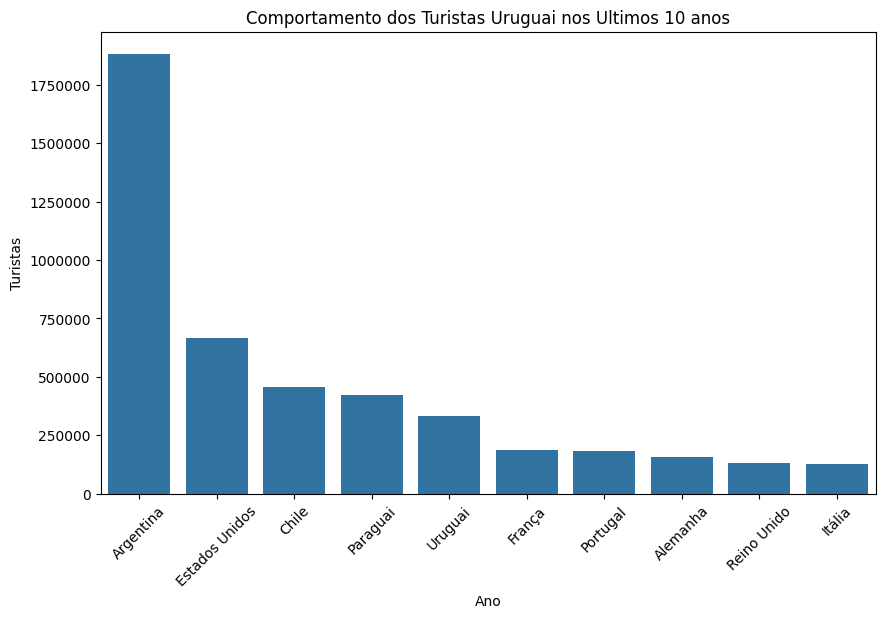

In [61]:
plt.figure(figsize=(10,6))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(data=soma_ult_ano, x='País', y='Chegadas')
plt.title('Comportamento dos Turistas Uruguai nos Ultimos 10 anos')
plt.xticks(rotation=45)
plt.xlabel('Ano')
plt.ylabel('Turistas')
plt.show()

##Como o turismo varia por continente de origem?

In [71]:
cont = df[['Chegadas','Continente', 'ano']].groupby(['ano','Continente'])['Chegadas'].sum().reset_index()
cont

,Continente,Chegadas
0,América Central e Caribe,1100439
1,América do Norte,20259922
2,América do Sul,75211355
3,Continente não especificado,183730
4,Europa,41906631
5,Oceania,1105859
6,África,1897169
7,Ásia,5765091


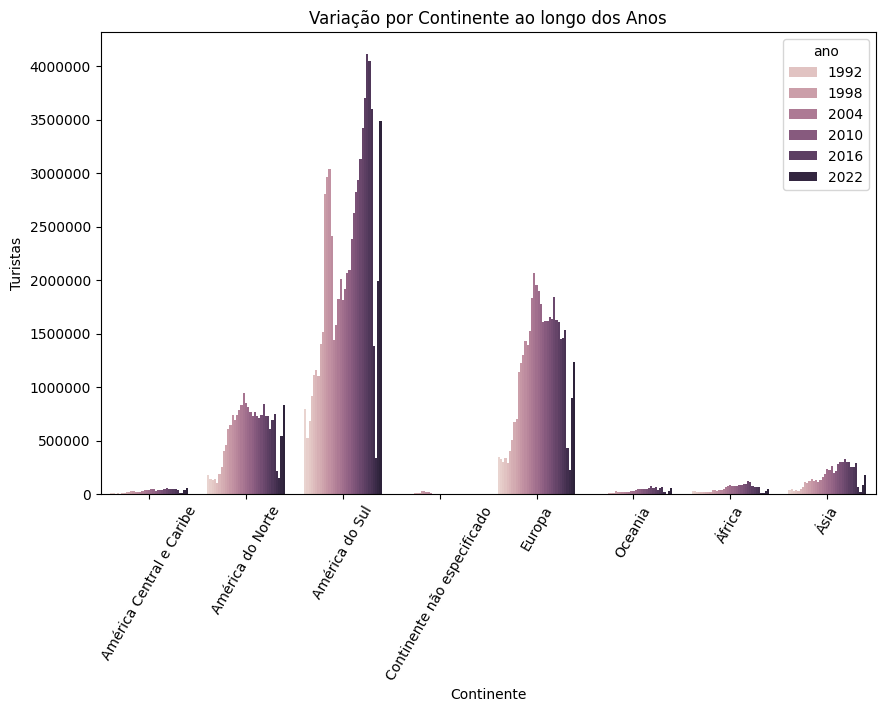

In [83]:
plt.figure(figsize=(10,6))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(data = cont, x= 'Continente', y= 'Chegadas', hue='ano')
plt.title('Variação por Continente ao longo dos Anos')
plt.ylabel('Turistas')
plt.xticks(rotation=60)
plt.show()

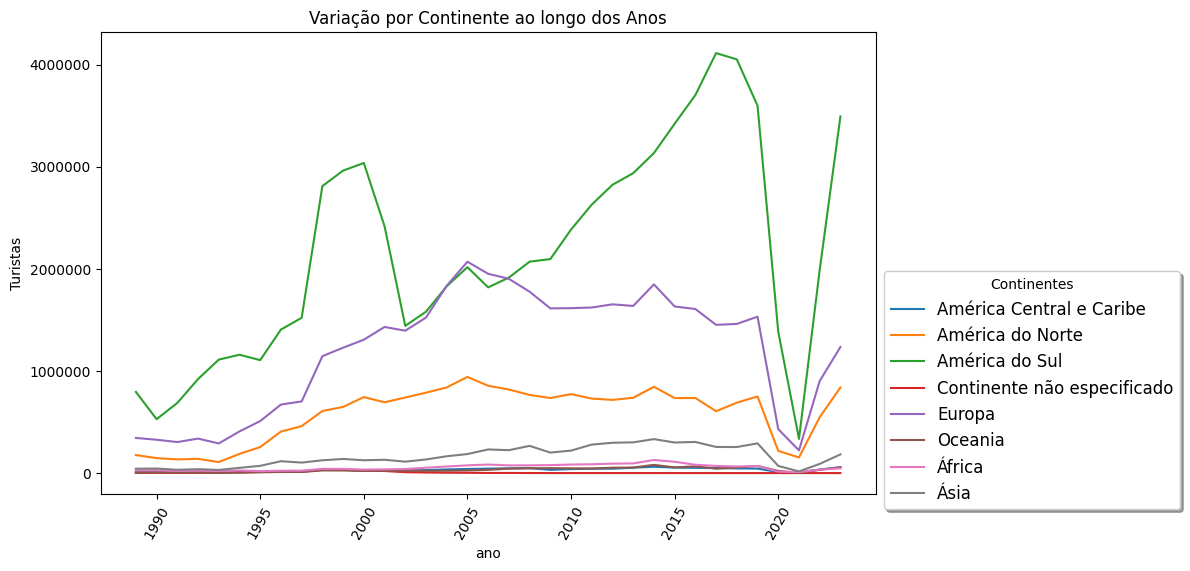

In [134]:
plt.figure(figsize=(10,6))
plt.ticklabel_format(style='plain', axis='y')
sns.lineplot(data = cont, x= 'ano', y= 'Chegadas', hue='Continente')
plt.title('Variação por Continente ao longo dos Anos')
plt.ylabel('Turistas')
plt.xticks(rotation=60)
plt.legend(title= 'Continentes', loc='upper left', bbox_to_anchor=(1,0.5), shadow=True, fancybox=True, fontsize='large')
plt.show()

Observando os continentes, constata-se que a América do Sul é o principal continente de origem dos turistas, seguido pela Europa e por conseguinte, América do Norte.

## Qual é a distribuição das chegadas de turistas ao longo dos anos?

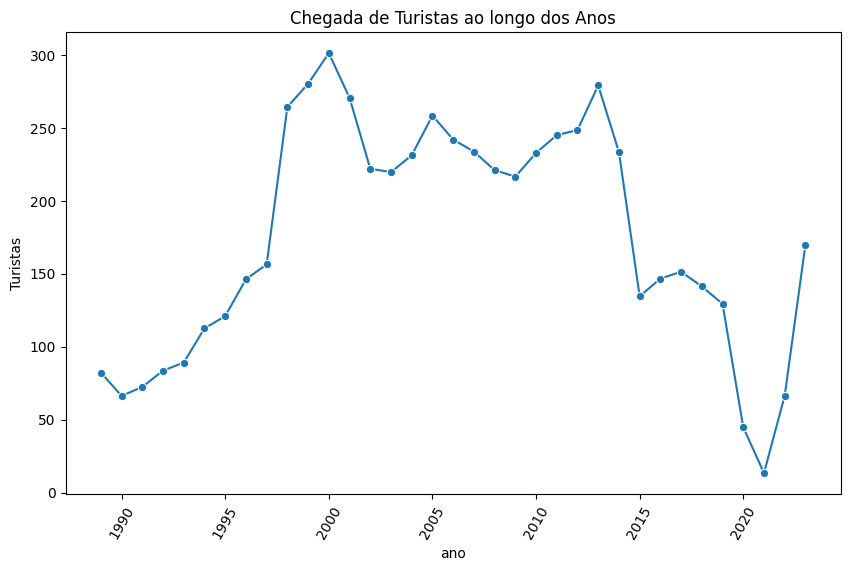

In [118]:
plt.figure(figsize=(10,6))
plt.ticklabel_format(style='plain', axis='y')
sns.lineplot(data = df, x= 'ano', y= 'Chegadas', marker='o', errorbar=None)
plt.title('Chegada de Turistas ao longo dos Anos')
plt.ylabel('Turistas')
plt.xticks(rotation=60)
plt.show()

É possível observar o crescimento antes dos anos 2000 e o comportamento após os anos 2000. Onde de 1989 a meados de 200 houve um crescimento gradativo no turismo. Esse crescimento pode ser causado pelas políticas de relações públicas com a Argentina, considerando que em 2000 foi implementado o câmbio favorável, facilitando assim, a entrada de turistas argentinos, que como foi constatado, é a principal origem de turistas no Brasil.

A grande queda no turismo, em um cenário geral, nos anos de 2019 e 2020 não deve ser considerada devido ao período de pandemia enfrentado. Após esse período, a partir de 2022, o comportamento do turismo no país possuiu um crescimento, com uma tendência a se normalizar.


# Quais são os meses com maior número de chegadas de turistas?

# Qual é a distribuição das chegadas de turistas por UF?

# Qual é a distribuição das chegadas de turistas por continente e UF?

# Como o turismo varia por UF ao longo do tempo?

# Qual via de turismo (aérea, terrestre, marítima) é a mais comum e como isso mudou ao longo do tempo?

# Quais são as diferenças nas tendências de turismo por continente de origem antes e depois de 2000?

# Quais países contribuem mais para o turismo em cada continente?

# Existem sazonalidades nas chegadas de turistas ao longo dos meses?

# Qual é a correlação entre crises econômicas globais e o turismo para o Brasil?